In [8]:
# Customer Segmentation Project 
## Clustering data using K-means

# Import libraries
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans


In [9]:
# Load dataset
df = pd.read_csv("credit_card_customer_data.csv",delimiter=",")

# Remove NaN
nr_samples_before = df.shape[0]
df = df.dropna()
print('Removed %s samples' % (nr_samples_before - df.shape[0]))

# Size of the data set after removing NaN
print(df.shape)


Removed 0 samples
(660, 7)


In [10]:
# Explore type of data and feature names
df.sample(8)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
603,604,44403,60000,6,3,2,3
157,158,61009,17000,1,2,5,8
302,303,57565,17000,4,2,2,2
509,510,94529,30000,4,4,2,1
240,241,46813,20000,4,2,2,1
572,573,59074,71000,7,4,0,2
97,98,52736,15000,2,0,5,4
50,51,51182,13000,1,0,5,9


In [11]:
# Select continuous variables for clustering
X = df.iloc[:, 0:10]
X.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [15]:
# Research Question 1: How can customers be grouped based on their financial and interaction behavior?

# Select relevant features for clustering
X = df[['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']]
X.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


In [24]:
# Normalize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

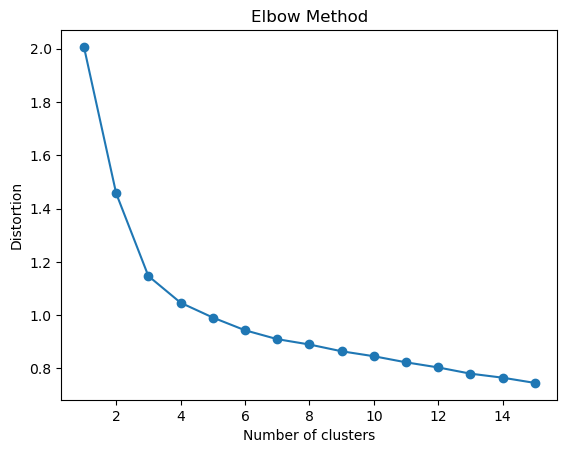

In [25]:
# Research Question 2: What is the optimal number of clusters?
# Normalize data



C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

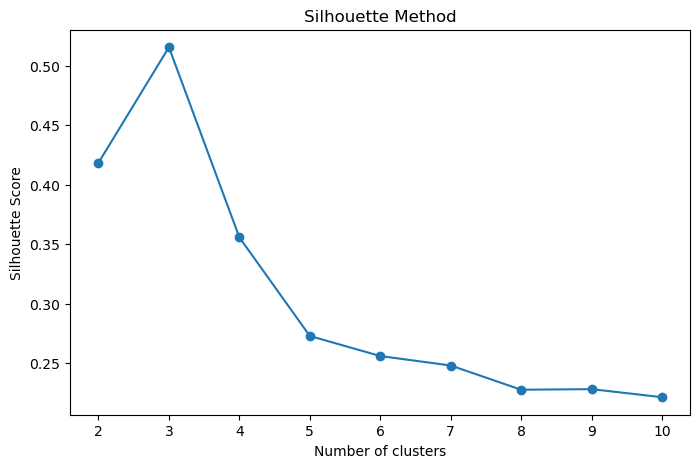

In [26]:
# Silhouette method to validate number of clusters
silhouette_scores = []
kmax = 10
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels, metric='euclidean'))

# Plot Silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, kmax+1), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()


In [28]:
# Research Question 3: What distinct customer segments exist, and how can they be characterized?
import os
os.environ['OMP_NUM_THREADS'] = '3'
# Apply K-means with optimal number of clusters (k=3 based on previous analysis)
km_final = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
clusters = km_final.fit_predict(X_scaled)

# Add cluster labels to original dataset
df['Cluster'] = clusters


C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [29]:
# Analyze cluster centers
cluster_centers = scaler.inverse_transform(km_final.cluster_centers_)
cluster_summary = pd.DataFrame(cluster_centers, columns=['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'])
cluster_summary['Cluster'] = range(1, 4)
print(cluster_summary)


   Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0     141040.000000            8.740000           0.600000   
1      12174.107143            2.410714           0.933036   
2      33782.383420            5.515544           3.489637   

   Total_visits_online  Total_calls_made  Cluster  
0            10.900000          1.080000        1  
1             3.553571          6.870536        2  
2             0.981865          2.000000        3  


In [32]:
# Check the number of observations in each clustes 
# Check the number of observations in each cluster
cluster_counts = df['Cluster'].value_counts()
print(cluster_counts)



2    386
1    224
0     50
Name: Cluster, dtype: int64


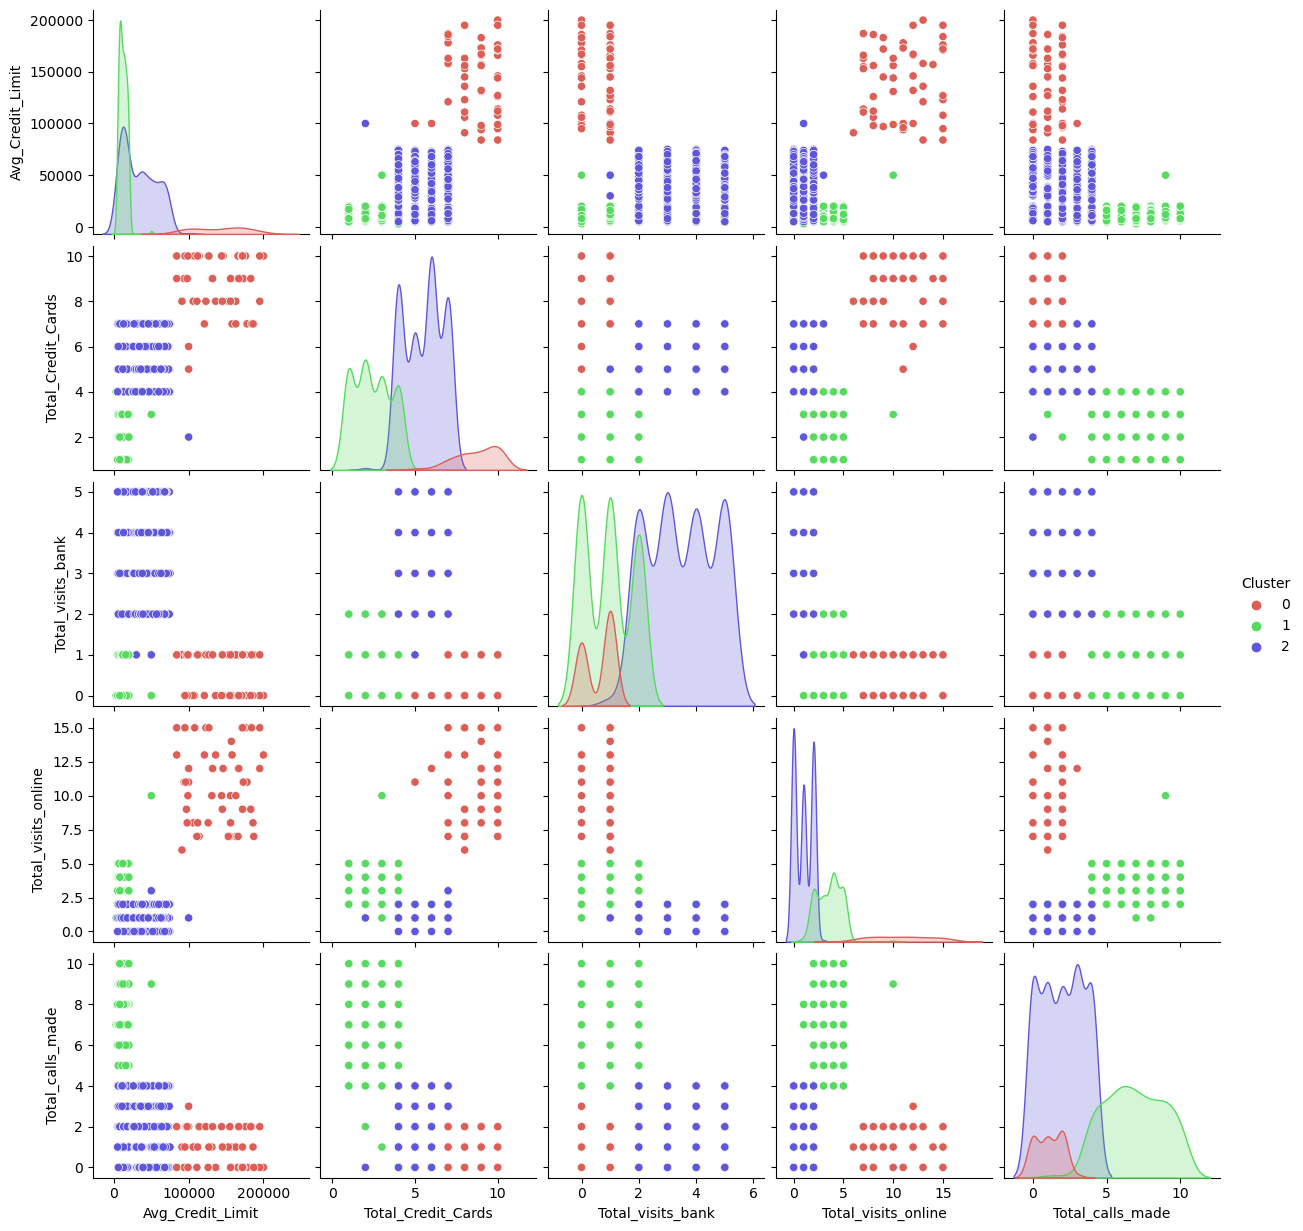

In [33]:
# Research Question 4: How can insights from these clusters improve business strategies?

# Visualize clusters using pair plots
sns.pairplot(df, vars=['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'], hue='Cluster', palette=sns.color_palette('hls', 3))
plt.show()

# Insights can be derived from cluster_summary and visualizations for targeted strategies.
